In [49]:
import pandas as pd
import numpy as np

## Ejercicio 1

La tabla siguiente corresponde a la función de probabilidad de una variable aleatoria discreta $X$:

$$
\begin{array}{|c|c|c|c|c|c|}
\hline
\text{Valores } x_i \text{ de } X & 1 & 2 & 3 & 4 & 5 \\
\hline
p(x_i) & 0{,}1 & 0{,}1 & 0{,}3 & 0{,}3 & 0{,}2 \\
\hline
\end{array}
$$

**a) Hallar:**

a.1) $p(X \geq 2)$  
a.2) $p(1 \leq X \leq 3)$  
a.3) $p(1 < X \leq 3)$  
a.4) $p(X \leq 1)$  
a.5) $p(X > 2)$  
a.6) $p(X \leq 3)$

**b) Hallar y graficar la función de distribución de $X$.**

In [50]:
tabla1 = pd.DataFrame({
    'X': [1, 2, 3, 4, 5],
    'p': [0.1, 0.1, 0.3, 0.3, 0.2]
})

tabla1

,X,p
0,1,0.1
1,2,0.1
2,3,0.3
3,4,0.3
4,5,0.2


In [51]:
# a.1 Calculamos p(X ≥ 2) sumando las probabilidades donde X ≥ 2
p_X_mayor_igual_2 = tabla1.loc[tabla1['X'] >= 2, 'p'].sum()
print(f"p(X ≥ 2) = {p_X_mayor_igual_2:.1f}")

# a.1 Calculamos p(X ≥ 2) usando numpy. Calculamos 1 - p(X < 2)
p_X_mayor_igual_2_numpy = 1 - np.sum(tabla1.loc[(tabla1['X'] < 2), 'p'])
print(f"p(X ≥ 2) usando numpy = {p_X_mayor_igual_2_numpy:.1f}")

p(X ≥ 2) = 0.9
p(X ≥ 2) usando numpy = 0.9


In [52]:
# a.2 Calculamos p(1 ≤ X ≤ 3) sumando las probabilidades donde 1 ≤ X ≤ 3
p_1_menor_igual_X_menor_igual_3 = tabla1.loc[(tabla1['X'] >= 1) & (tabla1['X'] <= 3), 'p'].sum()
print(f"p(1 ≤ X ≤ 3) = {p_1_menor_igual_X_menor_igual_3:.1f}")

# a.3 Calculamos p(1 ≤ X ≤ 3) usando numpy. Calculamos p(X ≤ 3) - p(X < 1)
p_1_menor_igual_X_menor_igual_3_np = np.sum(tabla1.loc[(tabla1['X'] <= 3), 'p']) - np.sum(tabla1.loc[(tabla1['X'] < 1), 'p'])
print(f"p(1 ≤ X ≤ 3) usando numpy = {p_1_menor_igual_X_menor_igual_3_np:.1f}")

p(1 ≤ X ≤ 3) = 0.5
p(1 ≤ X ≤ 3) usando numpy = 0.5


In [53]:
# a.3 Calculamos p(2 ≤ X < 4) sumando las probabilidades donde 2 ≤ X < 4
p_2_menor_igual_X_menor_4 = tabla1.loc[(tabla1['X'] >= 2) & (tabla1['X'] < 4), 'p'].sum()
print(f"p(2 ≤ X < 4) = {p_2_menor_igual_X_menor_4:.1f}")

# a.3 Calculamos p(2 ≤ X < 4) usando numpy. Calculamos p(X < 4) - p(X < 2)
p_2_menor_igual_X_menor_4_np = np.sum(tabla1.loc[(tabla1['X'] < 4), 'p']) - np.sum(tabla1.loc[(tabla1['X'] < 2), 'p'])
print(f"p(2 ≤ X < 4) usando numpy = {p_2_menor_igual_X_menor_4_np:.1f}")

p(2 ≤ X < 4) = 0.4
p(2 ≤ X < 4) usando numpy = 0.4


In [ ]:
# a.4 Calculamos p(X ≤ 1) sumando las probabilidades donde X ≤ 1
p_X_menor_igual_1 = tabla1.loc[(tabla1['X'] <= 1), 'p'].sum()
print(f"p(X ≤ 1) = {p_X_menor_igual_1:.1f}")

# a.4 Calculamos p(X ≤ 1) usando numpy
p_X_menor_igual_1_numpy = np.sum(tabla1.loc[(tabla1['X'] <= 1), 'p'])
print(f"p(X ≤ 1) usando numpy = {p_X_menor_igual_1_numpy}")

p(X ≤ 1) = 0.1
p(X ≤ 1) usando numpy = 0.1


In [60]:
# a.5 Calculamos p(X > 2) sumando las probabilidades donde X > 2
p_X_mayor_2 = tabla1.loc[(tabla1['X'] > 2), 'p'].sum()
print(f"p(X > 2) = {p_X_mayor_2}")

# a.5 Calculamos p(X > 2) usando numpy. Calculamos 1 - p(X ≤  2)
p_X_mayor_2_numpy = 1 - np.sum(tabla1.loc[(tabla1['X'] <= 2), 'p'])
print(f"p(X > 2) usando numpy = {p_X_mayor_2_numpy}")

p(X > 2) = 0.8
p(X > 2) usando numpy = 0.8


In [62]:
# a.6 Calculamos p(X ≤ 3) sumando las probabilidades donde X ≤ 3
p_X_menor_igual_3 = tabla1.loc[(tabla1['X'] <= 3), 'p'].sum()
print(f"p(X ≤ 3) = {p_X_menor_igual_3:.1f}")

# a.6 Calculamos p(X ≤ 3) usando numpy
p_X_menor_igual_3_numpy = np.sum(tabla1.loc[tabla1['X'] <= 3, 'p'])
print(f"p(X ≤ 3) usando numpy = {p_X_menor_igual_3_numpy:.1f}")

p(X ≤ 3) = 0.5
p(X ≤ 3) usando numpy = 0.5


In [ ]:
# b Hallar y graficar la función de distribución acumulada F(x) = P(X ≤ x)
# Calculamos la función de distribución acumulada F(x)
tabla1['F(x)'] = tabla1['p'].cumsum()
tabla1

,X,p,F(x)
0,1,0.1,0.1
1,2,0.1,0.2
2,3,0.3,0.5
3,4,0.3,0.8
4,5,0.2,1.0


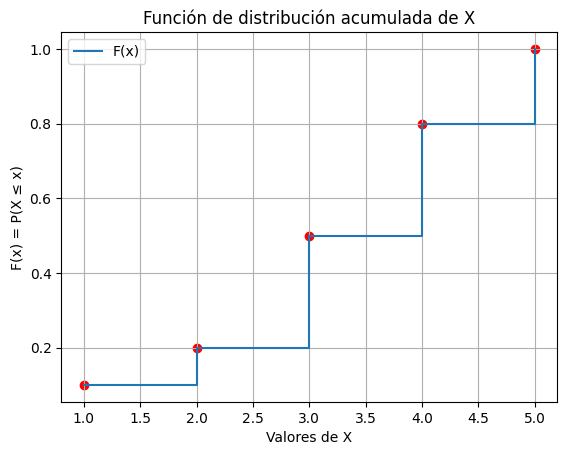

In [64]:
import matplotlib.pyplot as plt

# Graficamos la función de distribución acumulada F(x)
plt.step(tabla1['X'], tabla1['F(x)'], where='post', label='F(x)')
plt.scatter(tabla1['X'], tabla1['F(x)'], color='red')
plt.xlabel('Valores de X')
plt.ylabel('F(x) = P(X ≤ x)')
plt.title('Función de distribución acumulada de X')
plt.grid(True)
plt.legend()
plt.show()